Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline 

Data loading and clarification

In [2]:
df = pd.read_csv(r"C:\Users\User\Desktop\Artificial Intelligence Lab 3\Features data set.csv")  #Read the data
df.shape  #Display the dataset size (meet AI assignment lAB 3 requirement) 

(8190, 12)

In [3]:
df.info() #Examine is there any missing data from dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


Examine Correlation of dataset

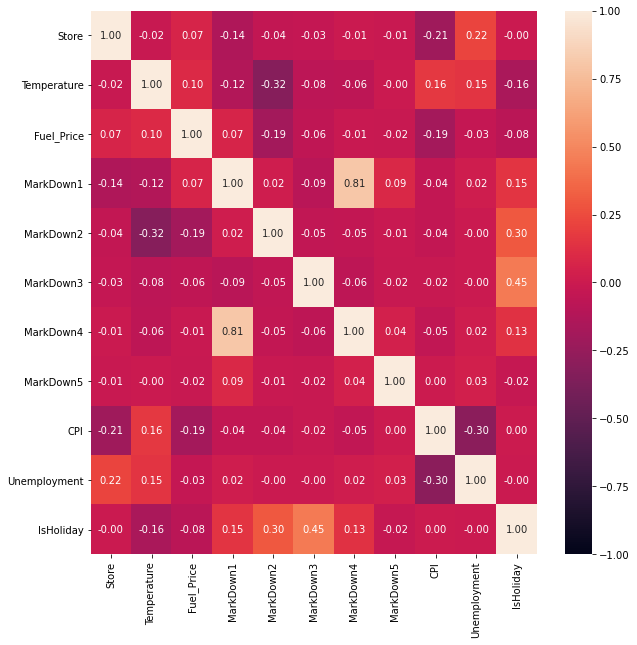

In [4]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True,fmt = '.2f',vmin=-1.00,vmax=1.00)
plt.show()

In [5]:
#Data Preprocessing- Remove nan value which exist on the specific column: store,date,temperature,fuel_price,CPI,unemployment
store=df.dropna(subset=['Store','Date','Temperature','Fuel_Price','CPI','Unemployment'])
store=store.drop_duplicates()

In [6]:
store_to_be_analyzed= store.iloc[:,[0,2,3,9,10]][df.Store <=3]
store_to_be_analyzed

<ipython-input-6-e98358f87680>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  store_to_be_analyzed= store.iloc[:,[0,2,3,9,10]][df.Store <=3]


,Store,Temperature,Fuel_Price,CPI,Unemployment
0,1,42.31,2.572,211.096358,8.106
1,1,38.51,2.548,211.242170,8.106
2,1,39.93,2.514,211.289143,8.106
3,1,46.63,2.561,211.319643,8.106
4,1,46.50,2.625,211.350143,8.106
...,...,...,...,...,...
528,3,60.69,3.606,228.555913,6.108
529,3,65.89,3.583,228.642888,5.999
530,3,67.56,3.529,228.729864,5.999
531,3,71.69,3.451,228.729864,5.999


Time

In [7]:
def tic():
    import time
    global startTime_for_tictoc
    startTime_for_tictoc = time.time()

In [8]:
def toc():
    import time, math;
    if 'startTime_for_tictoc' in globals():
        dt = math.floor(100*(time.time() - startTime_for_tictoc))/100.;
        print('\nProcessing time is {} second(s).'.format(dt));
    else:
        print('Start time not set. You should call tic before toc.');

In [9]:
#Spliting the dataset into training and test samples (60% Train, 40% Test)
x=store_to_be_analyzed.drop('Store',axis=1)
y=store_to_be_analyzed.Store

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.4,random_state=1)

Support Vector Machine (SVM) Classification

In [10]:
tic()

#Build SVM model
svc=SVC()
svc.fit(x_train,y_train)
print('Accuracy of SVM classifier on training set: {:.4f}'.format(svc.score(x_train,y_train)))
print('Accuracy of SVM classifier on testing set: {:.4f}'.format(svc.score(x_test,y_test)))

Accuracy of SVM classifier on training set: 0.3914
Accuracy of SVM classifier on testing set: 0.3202


In [11]:
#Show the score of accuracy for SVM model
scores=cross_val_score(svc,x,y,cv=10)
print(scores)
print("CrossValidation Accuracy : %0.4f (+/- %0.4f)" % (scores.mean(),scores.std() *2))

[0.41176471 0.33333333 0.45098039 0.43137255 0.33333333 0.45098039
 0.41176471 0.32       0.44       0.5       ]
CrossValidation Accuracy : 0.4084 (+/- 0.1143)


In [12]:
#Show the prediction of stores for SVM model
cross_val_predict(SVC(),x,y)

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 1, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [13]:
y_pred = svc.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)
print (classification_report(y_test, y_pred))


Accuracy Of SVM For The Given Dataset :  0.32019704433497537
              precision    recall  f1-score   support

           1       0.30      0.42      0.35        66
           2       0.30      0.30      0.30        66
           3       0.40      0.24      0.30        71

    accuracy                           0.32       203
   macro avg       0.33      0.32      0.32       203
weighted avg       0.33      0.32      0.32       203



[[28 28 10]
 [30 20 16]
 [36 18 17]]


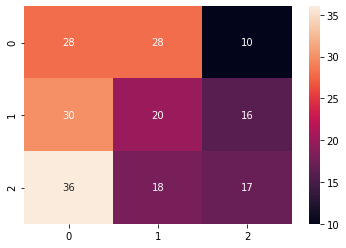

In [14]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
print(confusion_matrix(y_test,y_pred))
plt.show()

In [15]:
#SVM model needs to have its parameters tuned
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.328 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.328 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.328 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.279 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.333 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.328 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.328 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.328 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.295 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.333 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.426 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.639 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.836 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.934 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.869 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.836 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.767 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.590 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.672 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.541 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.525 total time=   0.0s
[CV 5/5] END ...C=1000, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [16]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.01)


In [17]:
grid_predictions = grid.predict(x_test)
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           1       0.70      0.74      0.72        66
           2       0.78      0.80      0.79        66
           3       0.94      0.86      0.90        71

    accuracy                           0.80       203
   macro avg       0.81      0.80      0.80       203
weighted avg       0.81      0.80      0.81       203



In [18]:
#Build a new model with better hyperparameter
svc=SVC(C=1000,gamma=0.01,kernel='rbf')
svc.fit(x_train,y_train)
print('Accuracy of SVM classifier on training set: {:.4f}'.format(svc.score(x_train,y_train)))
print('Accuracy of SVM classifier on testing set: {:.4f}'.format(svc.score(x_test,y_test)))

Accuracy of SVM classifier on training set: 0.9605
Accuracy of SVM classifier on testing set: 0.8030


In [19]:
newscores=cross_val_score(svc,x,y,cv=10)
print(newscores)
print("CrossValidation Accuracy : %0.4f (+/- %0.4f)" % (newscores.mean(),scores.std() *2))

toc()

[0.68627451 0.54901961 0.66666667 0.49019608 0.45098039 0.2745098
 0.56862745 0.52       0.8        0.58      ]
CrossValidation Accuracy : 0.5586 (+/- 0.1143)

Processing time is 4.59 second(s).


K Nearest Neighbours (KNN) Classification

In [20]:
tic()

#Build KNN model
KNN = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='kd_tree', leaf_size=30,
                            p=2, metric='minkowski', n_jobs=-1)

KNN.fit(x_train, y_train)
print('Accuracy of KNN classifier on training set: {:.4f}'.format(KNN.score(x_train,y_train)))
print('Accuracy of KNN classifier on testing set: {:.4f}'.format(KNN.score(x_test,y_test)))

Accuracy of KNN classifier on training set: 0.6743
Accuracy of KNN classifier on testing set: 0.4926


In [21]:
#Show the prediction of stores for KNN model
cross_val_predict(KNN,x,y)

array([1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 3, 3, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 3, 1, 3, 1, 1, 2, 2,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 1, 3, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 3, 2, 3,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 3, 2, 3, 3, 1, 3, 3, 3, 3,
       3, 1, 3, 3, 2, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 2, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 2, 2, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 2,
       2, 3, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 3, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,


Accuracy Of KNN For The Given Dataset :  0.49261083743842365
              precision    recall  f1-score   support

           1       0.36      0.53      0.43        66
           2       0.42      0.36      0.39        66
           3       0.85      0.58      0.69        71

    accuracy                           0.49       203
   macro avg       0.54      0.49      0.50       203
weighted avg       0.55      0.49      0.51       203

[[35 27  4]
 [39 24  3]
 [24  6 41]]


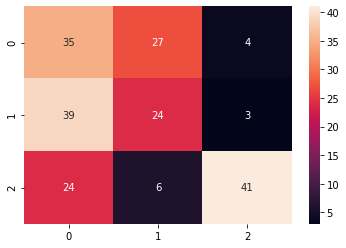

In [22]:
#Shows Classification Report and Confusion Matrix
y_pred=KNN.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nAccuracy Of KNN For The Given Dataset : ", accuracy)
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)
print(confusion_matrix(y_test,y_pred))
plt.show()

In [23]:
#CrossValidation Accuracy
score = cross_val_score(KNN,x,y,cv=10)
print(score)
print("CrossValidation Accuracy : %0.4f (+/- %0.4f)" % (score.mean(),score.std() *2))

[0.45098039 0.39215686 0.29411765 0.19607843 0.09803922 0.21568627
 0.43137255 0.4        0.54       0.52      ]
CrossValidation Accuracy : 0.3538 (+/- 0.2788)


In [24]:
#Start of Performing Hyperparameter for more Accurate Result
y_pred=KNN.predict(x_test)[:9]
y_pred

array([1, 1, 1, 3, 3, 2, 1, 1, 1], dtype=int64)

In [25]:
KNN.predict_proba(x_test)[:9]

array([[0.4, 0.4, 0.2],
       [0.4, 0.4, 0.2],
       [0.6, 0.4, 0. ],
       [0. , 0.4, 0.6],
       [0. , 0. , 1. ],
       [0.4, 0.6, 0. ],
       [0.6, 0.4, 0. ],
       [0.8, 0.2, 0. ],
       [0.6, 0.4, 0. ]])

In [26]:
#Improvising GRIDSEARCH as Hyperparameter Method
grid_params = {
    'n_neighbors' : [1,3,5,7,11],
    'weights' : ['uniform','distance'],
    'metric' : ['euclidean','manhattan'],
}

gs = GridSearchCV(
KNeighborsClassifier(),
    grid_params,
    verbose =1,
    cv =3,
    n_jobs =-1
)
gs_results = gs.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [27]:
print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

0.5853879505597619
KNeighborsClassifier(metric='manhattan', weights='distance')
{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [28]:
#Classificartion after Hyperparameter 
gs_predictions = gs.predict(x_test)
print(classification_report(y_test, gs_predictions))

              precision    recall  f1-score   support

           1       0.48      0.53      0.50        66
           2       0.51      0.55      0.53        66
           3       0.95      0.80      0.87        71

    accuracy                           0.63       203
   macro avg       0.65      0.63      0.63       203
weighted avg       0.66      0.63      0.64       203



In [29]:
#Train and Test Score after Hyperparameter
KNC=KNeighborsClassifier(  n_neighbors=5,
    weights='distance',
    algorithm='kd_tree',
    leaf_size=30,
    p=2,
    metric='manhattan',
    n_jobs=-1,)
KNC.fit(x_train,y_train)
print('Accuracy of KNN classifier on training set: {:.4f}'.format(KNC.score(x_train,y_train)))
print('Accuracy of KNN classifier on testing set: {:.4f}'.format(KNC.score(x_test,y_test)))

Accuracy of KNN classifier on training set: 1.0000
Accuracy of KNN classifier on testing set: 0.6305


In [30]:
#New Cross Validation Accuracy after Hyperparameter
Nscore = cross_val_score(KNC,x,y,cv=10)
print(Nscore)
print("CrossValidation Accuracy : %0.4f (+/- %0.4f)" % (Nscore.mean(),score.std() *2))

toc()

[0.64705882 0.49019608 0.56862745 0.25490196 0.11764706 0.31372549
 0.2745098  0.44       0.5        0.5       ]
CrossValidation Accuracy : 0.4107 (+/- 0.2788)

Processing time is 5.85 second(s).
